# Lecture Fourier Transform 3
---

### Introduction
This section will introduce the properties of so called **LTI**-systems (**l**inear **t**ime-**i**nvariant systems). Subsequently the **transfer function** (the Fourier transform of the impulse response function) will be discussed. This functions decribes how the amplitude of each frequency component of the input signal is modified while passing through the system.
Finaly it will be shown how LTI systems (described by differential equations) may be solved using the Fourier theory we have developed so far.

#### LTI-Systems
Linear time-invariant systems obey the following properties

- Time-invariance: 
$$
i(t) = \delta(t-t_1) \quad \rightarrow \quad o(t) = h(t-t_1)
$$
- Linearity
$$
i(t) = i_1\delta(t-t_1) + i_2 \delta(t-t_1)\quad \rightarrow \quad o(t) =
i_1h(t-t_1) + i_2h(t-t_2)
$$

#### The transfer function
Any arbitrary input signal $i(t)$ may thought of a continous sequency of single pulses and hence can be written as
$$
i(t) = \int i(\tau)\delta(t-\tau)\mathrm{d}\tau\,.
$$
If we compare this expression to the linearity-property from the LTI-Systems section above, we may write for the output $o(t)$:
$$
o(t) = \int i(\tau)h(t-\tau)\mathrm{d}\tau = i(t)\ast h(t)\,.
$$
The output signal $o(t)$ of any linear system is given by the convolution of the input signal $i(t)$ with the impulse response function $h(t)$. In the frequency domain we obtain
$$
O(\omega) = H(\omega)I(\omega) \quad \Rightarrow \quad H(\omega) = \frac{O(\omega)}{I(\omega)} \,.
$$
In other words: If the input is given by $i(t)=e^{i\omega t}$ we obtain:
$$
i(t) = e^{i\omega t}\quad  \Rightarrow \quad o(t) = H(\omega)e^{i\omega t} = |H(\omega)|e^{i(\omega t+\phi(\omega))}
$$
Hence the transfer function tells us, how each frequency component (you can also say each mode) is modified (in amplitude and phase). The frequency $\omega$ itself does not change (this is only 
true for linear systems).

**Example:** We consider the RC-circuit. We already found $H(\omega)$ to be given by
$$
H(\omega) = \frac{1}{iRC\omega+1}\,.
$$
Writing $H(\omega) = |H(\omega)|e^{i\phi(\omega)}$ we have
$$
|H(\omega)| =\frac{1}{\sqrt{(RC)^2\omega^2+1}}, \quad \phi(\omega) = 
\mathrm{arctan}\left(-\frac{RC\omega}{1}\right)
$$
Both, $|H(\omega)|$ and $\phi(\omega)$ are depicted below.

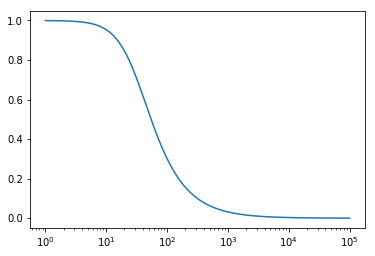

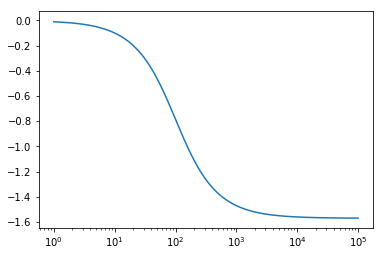

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

omega = np.linspace(0,10000,100000)

# Plot |H(omega)|
plt.semilogx(1/np.sqrt(0.1*omega**2+1))
plt.show()
# Plot phi(omega)
plt.semilogx(np.arctan(-0.1*omega/1))
plt.show()

#### Solving LTI System with Fourier transform
We consider the problem
$$
L o(t) = i(t)\,,
$$
and want to find to find $o(t)$ (knowing $L$ and $i(t)$).
The solution of this problem is achieved within five steps:

- Step 0: Calculation of the homogeneous solution $o_h(t)$.
- Step 1: Transformation of the problem (i.e. the differential equation) into the frequency domain.
- Step 2: Solving the problem in the frequency domain (i.e. calculation if $I(\omega)$).
- Step 3: Transforming $I(\omega)$ back to time domain (using a Fourier table) to obtain $o_p(t)$.
- Step 4: Fix the constant(s) using the initial value(s).

**Example**: Consider the differential equatin
$$
y'(t) + y(t) = \Theta(t) e^{-t}, \quad y(0) = 0
$$
- Step 0:
$$
y_h(t) = c_1e^{-t}
$$
- Step 1:
$$
(i\omega + 1)Y(\omega) = \frac{1}{i\omega+1} 
$$
- Step 2:
$$
Y(\omega) = \frac{1}{(i\omega+1)^2} = i\frac{\mathrm{d}}{\mathrm{d}\omega}\frac{1}{i\omega + 1}
$$
- Step 3: With the rule differentation rule in the frequency domain ($i^{(n)}F^{(n)}(\omega) \quad \laplace \quad t^nf(t)$) we obtain
$$
y_p(t) = \Theta(t)\cdot t\cdot e^{-t}
$$
and hence
$$
y(t) = y_h(t) + y_p(t) = c_1e^{-t} + \Theta(t)\cdot t\cdot e^{-t}
$$
- Step 4: Solving the initial value problem we obtain $c_1=0$ and hence
$$
y(t) = \Theta(t)\cdot t\cdot e^{-t}
$$